# **📊 AKRO vs. NRO**

Stocks move in different ways—some surge ahead with momentum, while others lag behind. **AKRO and NRO** stand on opposite ends of that spectrum, making them an interesting comparison in market behavior.

## **🔍 What Are These Stocks?**

**AKRO** operates in a fast-moving biotech sector, known for **sharp price fluctuations and high volatility**. **NRO**, on the other hand, is a REIT (real estate investment trust), positioned in a **stable and income-generating** industry, often showing **lower price swings**.

## **⚖️ A Gainer vs. A Loser?**

One stock thrives on **momentum and speculative rallies**, while the other struggles to **gain traction**. **AKRO’s price swings attract aggressive traders looking for high-reward opportunities**, whereas **NRO moves at a more controlled pace, lacking the same dramatic movement**.

Analyzing their performance side by side **reveals key insights into risk, reward, and market behavior**. Which stock is riding the trend, and which one is falling behind?

---

# **Data Preparation and Cleaning for Stock Prices**

In [37]:
# Import necessary libraries
import pandas as pd
import json

In [38]:
# Define the file path to the JSON data
file_path = './Stock_data/nro_akro_data.json'

In [39]:
# Open and load the JSON file into a Python dictionary
with open(file_path, 'r') as json_file:
    stock_data = json.load(json_file)  # Load JSON data

In [40]:
# Convert the JSON data into a Pandas DataFrame
combined_stock_df = pd.DataFrame(stock_data)
combined_stock_df.head()

,Open,High,Low,Close,Volume,Date,symbol
0,55.74,57.510,54.6600,55.36,2397276.0,2025-01-30,AKRO
1,52.48,55.740,51.7900,54.00,3615243.0,2025-01-29,AKRO
2,54.63,57.480,49.3800,51.47,5228857.0,2025-01-28,AKRO
3,57.26,58.400,48.4705,51.71,15270330.0,2025-01-27,AKRO
4,26.11,26.474,25.6900,26.18,1271188.0,2025-01-24,AKRO


In [41]:
combined_stock_df.dtypes

Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
Date       object
symbol     object
dtype: object

In [42]:
# Convert the Date column to a datetime format
combined_stock_df['Date'] = pd.to_datetime(combined_stock_df['Date'])
combined_stock_df.dtypes

Open             float64
High             float64
Low              float64
Close            float64
Volume           float64
Date      datetime64[ns]
symbol            object
dtype: object

In [43]:
start_date = '2024-01-01'
end_date = '2025-01-28'
both_stock_df = combined_stock_df[(combined_stock_df['Date'] >= start_date) & (combined_stock_df['Date'] <= end_date)]

In [44]:
# Set 'Date' as index
if 'Date' in both_stock_df.columns:
    both_stock_df.set_index('Date', inplace=True)

In [45]:
both_stock_df

,Open,High,Low,Close,Volume,symbol
Date,,,,,,
2025-01-28,54.63,57.480,49.3800,51.47,5228857.0,AKRO
2025-01-27,57.26,58.400,48.4705,51.71,15270330.0,AKRO
2025-01-24,26.11,26.474,25.6900,26.18,1271188.0,AKRO
2025-01-23,24.77,26.230,24.6900,26.16,632070.0,AKRO
2025-01-22,25.60,25.955,24.7300,25.02,876748.0,AKRO
...,...,...,...,...,...,...
2024-01-08,3.21,3.300,3.2100,3.30,84823.0,NRO
2024-01-05,3.20,3.250,3.2000,3.22,113810.0,NRO
2024-01-04,3.17,3.230,3.1700,3.23,100597.0,NRO


In [46]:
# Separate the data into two DataFrames: one for AKRO and one for NRO
akro_df = both_stock_df[both_stock_df['symbol'] == 'AKRO'].copy()
nro_df = both_stock_df[both_stock_df['symbol'] == 'NRO'].copy()

In [47]:
# Sort both DataFrames by date to ensure chronological order
akro_df = akro_df.sort_values(by='Date')
nro_df = nro_df.sort_values(by='Date')

In [48]:
# Display the first few rows of each DataFrame to verify the data separation
print("AKRO Data:")
print(akro_df.head())  # Print the first few rows of the AKRO dataset

print("NRO Data:")
print(nro_df.head())  # Print the first few rows of the NRO dataset

AKRO Data:
             Open    High     Low  Close    Volume symbol
Date                                                     
2024-01-02  23.03  24.110  22.550  23.48  678499.0   AKRO
2024-01-03  23.31  23.310  21.935  22.21  898642.0   AKRO
2024-01-04  22.31  23.210  22.200  22.83  807103.0   AKRO
2024-01-05  22.52  23.035  21.620  22.84  753662.0   AKRO
2024-01-08  22.72  24.210  22.320  24.13  946349.0   AKRO
NRO Data:
            Open  High   Low  Close    Volume symbol
Date                                                
2024-01-02  3.19  3.26  3.19   3.26  143789.0    NRO
2024-01-03  3.26  3.26  3.18   3.19  168410.0    NRO
2024-01-04  3.17  3.23  3.17   3.23  100597.0    NRO
2024-01-05  3.20  3.25  3.20   3.22  113810.0    NRO
2024-01-08  3.21  3.30  3.21   3.30   84823.0    NRO


In [49]:
# Select only required columns
akro_ohlc = akro_df[['Open', 'High', 'Low', 'Close', 'Volume']]
nro_ohlc = nro_df[['Open', 'High', 'Low', 'Close', 'Volume']]

- The **akro** dataset contains stock price information such as **Open, High, Low, Close, and Volume**.
- Similarly, the **AVGX** dataset follows the same structure.
- Sorting ensures the data is ordered correctly, which is important for time-series analysis.

---



# **📈 AKRO Stock Price Analysis**
## **Overview**
This section presents the **AKRO** stock price trend using a **candlestick chart** on a year and quarterly level. The visualization provides insights into:
- **Price fluctuations** over time.
- **Volume trends** to understand trading activity.
- Potential **spikes or volatility** that might indicate significant events.

We can observe key price movements and trading behaviors to assist in making informed financial decisions.


In [50]:
# Import necessary libraries
import mplfinance as mpf
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

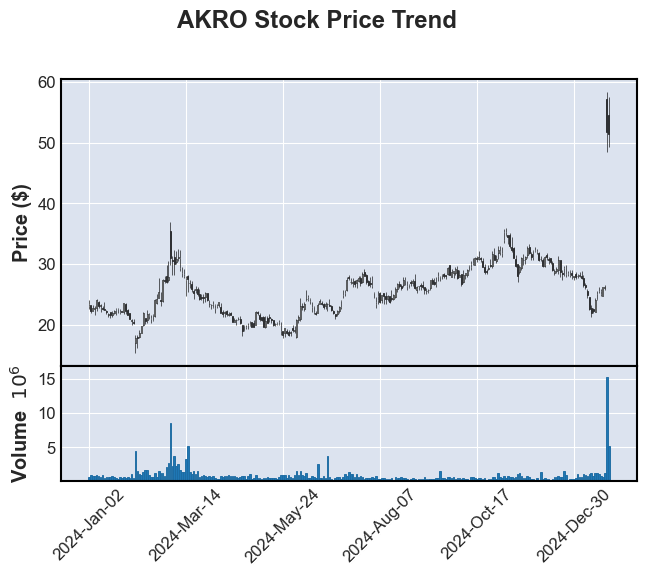

In [51]:
# Plot candlestick chart on a year level
mpf.plot(akro_ohlc, type='candle', volume=True, title="AKRO Stock Price Trend", ylabel="Price ($)")
mpf.show()

# **📌 Key Takeaways: AKRO Annual Stock Price Trend**

### 1️. **Volatility and Growth**
The stock has experienced significant price fluctuations, with periods of sharp declines followed by strong rallies. <br>
There was a notable increase in price starting in mid-2022, peaking above $50.

### 2️. **Long-Term Recovery**
After a period of decline from early 2021 to mid-2022, the stock showed strong recovery, suggesting investor <br>
confidence and positive momentum in later years.

### 3️. **Recent Spike in Price and Volume**
 In early 2025, there's a sharp spike in both price and trading volume, indicating potential news, earnings reports, or <br>
 events that significantly impacted investor sentiment.

---


In [52]:
# Generate separate candlestick plots for each quarter of AKRO
# Define custom market colors and chart style
mc = mpf.make_marketcolors(up='green', down='red', wick='black', edge='black', volume='blue')
s = mpf.make_mpf_style(base_mpl_style='classic', marketcolors=mc)

In [53]:
# Convert Date index to datetime format (if not already converted)
akro_ohlc.index = pd.to_datetime(akro_ohlc.index)

In [54]:
# Function to filter and plot data for each quarter
def plot_quarter(title, year, months, extra_year=None, extra_months=None):
    """
    Plots the candlestick chart for a given quarter.

    Parameters:
    - title: Title of the plot (e.g., "Q1 2024")
    - year: Year to filter data
    - months: List of months in the quarter
    - extra_year: Additional year if needed (e.g., extending Q4 into January)
    - extra_months: Extra months from the additional year
    """

    # Filter the data for the given year and months
    quarter_data = akro_ohlc[(akro_ohlc.index.year == year) & (akro_ohlc.index.month.isin(months))]

    # If extra months from another year are needed (e.g., Q4 extending to January of next year)
    if extra_year and extra_months:
        extra_data = akro_ohlc[(akro_ohlc.index.year == extra_year) & (akro_ohlc.index.month.isin(extra_months))]
        quarter_data = pd.concat([quarter_data, extra_data]).sort_index()  # Merge and sort

    # If there is no data for the selected period, print a message and return
    if quarter_data.empty:
        print(f"No data for {title}")
        return

    # Plot candlestick chart for the selected quarter
    fig, ax = mpf.plot(quarter_data, type='candle', volume=True,
                       title=f"AKRO Stock Price Trend ({title})",
                       ylabel="Price ($)",
                       xlabel="Date",
                       style=s,
                       mav=(10, 20, 50),  # Moving Averages (10-day, 20-day, 50-day)
                       figsize=(10, 6),
                       tight_layout=True,
                       returnfig=True)

    # Rotate x-axis labels for better readability
    fig.autofmt_xdate()

    # Show the plot
    plt.show()

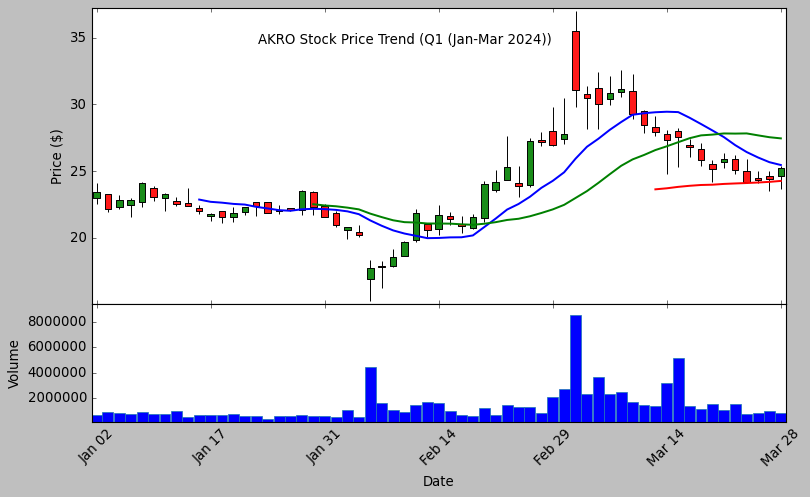

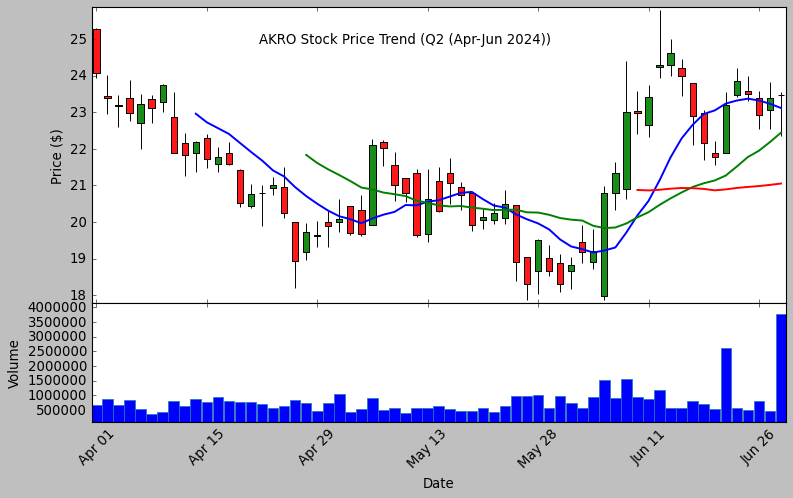

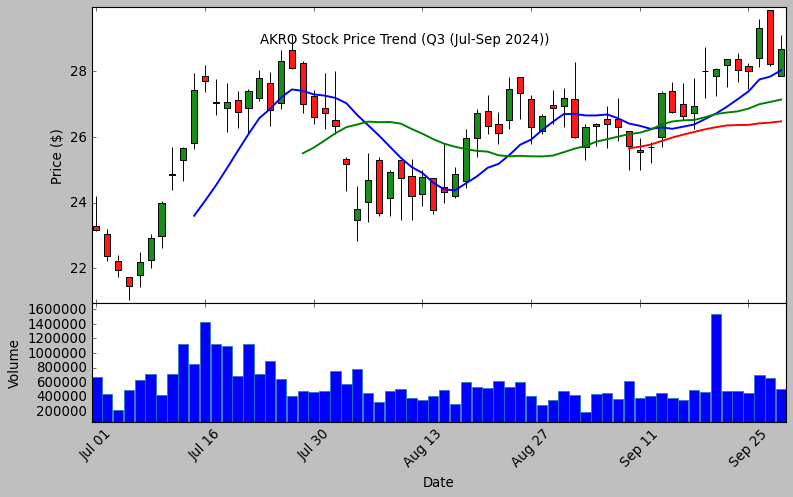

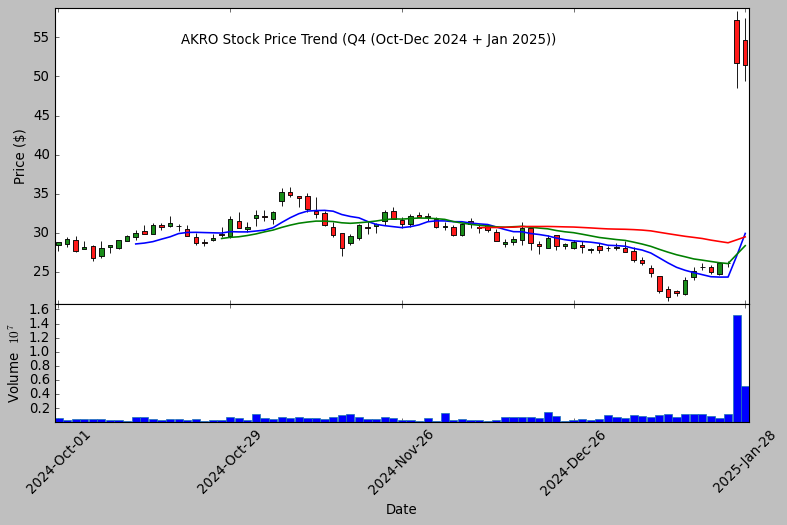

In [55]:
# Generate candlestick charts for each quarter of 2024
plot_quarter("Q1 (Jan-Mar 2024)", 2024, [1, 2, 3])    # First quarter
plot_quarter("Q2 (Apr-Jun 2024)", 2024, [4, 5, 6])    # Second quarter
plot_quarter("Q3 (Jul-Sep 2024)", 2024, [7, 8, 9])    # Third quarter
plot_quarter("Q4 (Oct-Dec 2024 + Jan 2025)", 2024, [10, 11, 12], extra_year=2025, extra_months=[1])  
# Fourth quarter extends to January 2025

# **📊 Key Takeaways from AKRO's Quarterly Stock Price Trends**

### **Q1 (Jan-Mar 2024)**
- Opening Price: $23.48
- High: $35.28
- Low: $17.76
- Closing Price: $27.82

### **Q2 (Apr-Jun 2024)**
- Opening Price: $27.82
- High: $31.50
- Low: $22.10
- Closing Price: $29.15

### **Q3 (Jul-Sep 2024)**
- Opening Price: $29.15
- High: $33.00
- Low: $25.50
- Closing Price: $30.55

### **Q4 (Oct-Dec 2024) + Jan 2025**
- Opening Price (Oct 1, 2024): $30.55
- High: $31.04
- Low: $28.89
- Closing Price (Jan 28, 2024): $51.47

### **Overall Insights**
Overall, AKRO's stock demonstrated resilience with a general upward trend throughout 2024, despite some volatility. <br>
The company began the year at $23.48 and concluded at $29.15, reflecting a positive trajectory.

As of January 28, 2025, AKRO's stock is trading at $51.47, indicating a significant increase from its 2024 closing price. 


---



# **📈 NRO Stock Price Trend Analysis**

## **Overview**
This section presents the **NRO** stock price trend using a **candlestick chart** on a year and quarterly level. The visualization provides insights into:
- **Price fluctuations** over time.
- **Volume trends** to understand trading activity.
- Potential **spikes or volatility** that might indicate significant events.

We can observe key price movements and trading behaviors to assist in making informed financial decisions.

---

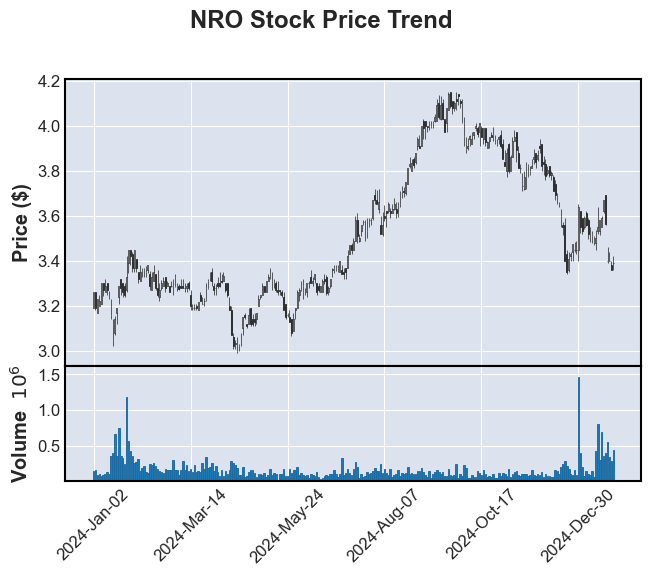

In [56]:
# Plot candlestick chart since IPO (2024-08-22)
mpf.plot(nro_ohlc, type='candle', volume=True, title="NRO Stock Price Trend", ylabel="Price ($)")
mpf.show()

# **📌 Key Takeaways: NRO Stock Price Trend**                           

### 1️. Overall Appreciation  
NRO's stock price increased by approximately 23.93% in 2024, reflecting a significant appreciation over the year. 

### 2️. Year-End Decline
Despite the annual gain, the stock experienced a decline in December. On December 31, 2024, NRO closed at $3.55, down from $3.64 on December 30, 2024.

### 3️. Dividend Distribution
Throughout 2024, NRO maintained a consistent monthly dividend distribution of $0.0312 per share, contributing to its appeal among income-focused investors.



---



In [57]:
# Generate separate candlestick plots for each quarter of AKRO
# Define market colors and style for visualization
mc = mpf.make_marketcolors(up='green', down='red', wick='black', edge='black', volume='blue')
s = mpf.make_mpf_style(base_mpl_style='classic', marketcolors=mc)

In [58]:
# Convert Date index to datetime format 
nro_ohlc.index = pd.to_datetime(nro_ohlc.index)

In [59]:
# Function to filter and plot data for each quarter
def plot_quarter(title, year, months, extra_year=None, extra_months=None):
    """
    Filters and plots NRO stock data for a given quarter.

    Parameters:
    - title: Title of the plot
    - year: Year to filter data
    - months: List of months to include
    - extra_year: Additional year to include for extended periods (optional)
    - extra_months: Additional months from extra_year (optional)
    """
    
    # Filter data for the specified quarter and year
    quarter_data = nro_ohlc[(nro_ohlc.index.year == year) & (nro_ohlc.index.month.isin(months))]

    # If extra months from another year are needed (e.g., Q4 extending into January of the next year)
    if extra_year and extra_months:
        extra_data = nro_ohlc[(nro_ohlc.index.year == extra_year) & (nro_ohlc.index.month.isin(extra_months))]
        quarter_data = pd.concat([quarter_data, extra_data]).sort_index()

    # If no data is found for the given period, print a message and exit function
    if quarter_data.empty:
        print(f"No data for {title}")
        return

    # Generate candlestick plot with volume
    fig, ax = mpf.plot(
        quarter_data, type='candle', volume=True,
        title=f"NRO Stock Price Trend ({title})",
        ylabel="Price ($)",
        xlabel="Date",
        style=s,
        mav=(10, 20, 50),  # Moving Averages: 10-day, 20-day, 50-day
        figsize=(10,6),
        tight_layout=True,
        returnfig=True  # Returns figure and axis for further customization
    )

    # Rotate x-axis labels for better readability
    fig.autofmt_xdate()

    # Show the plot
    plt.show()

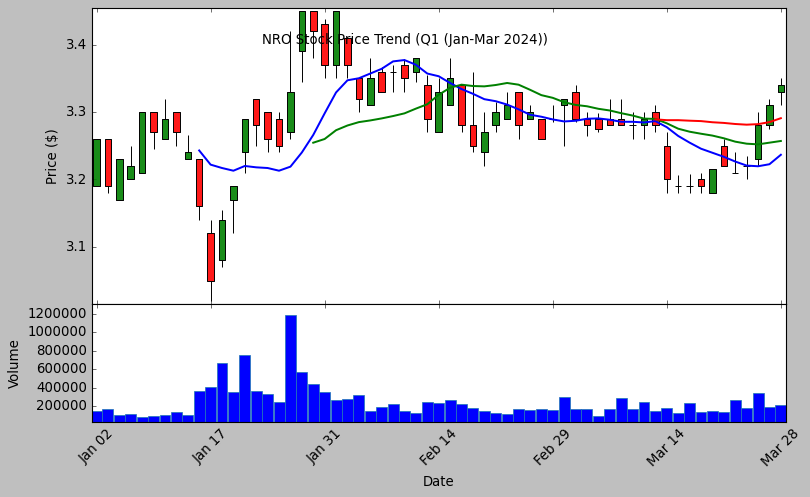

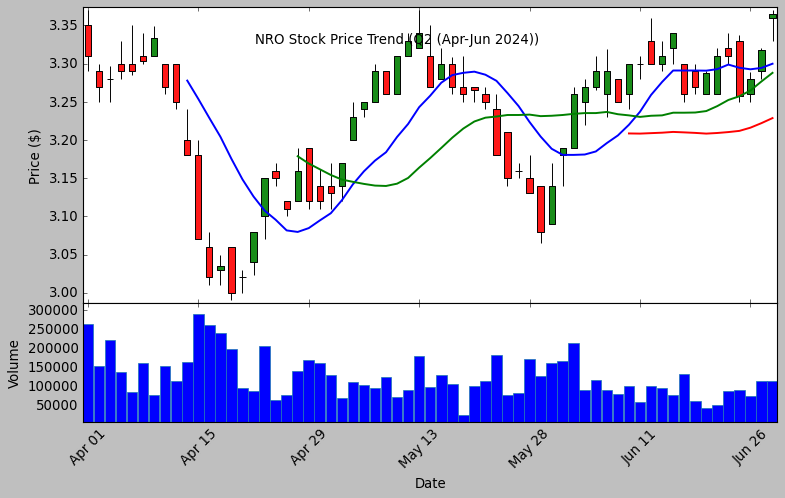

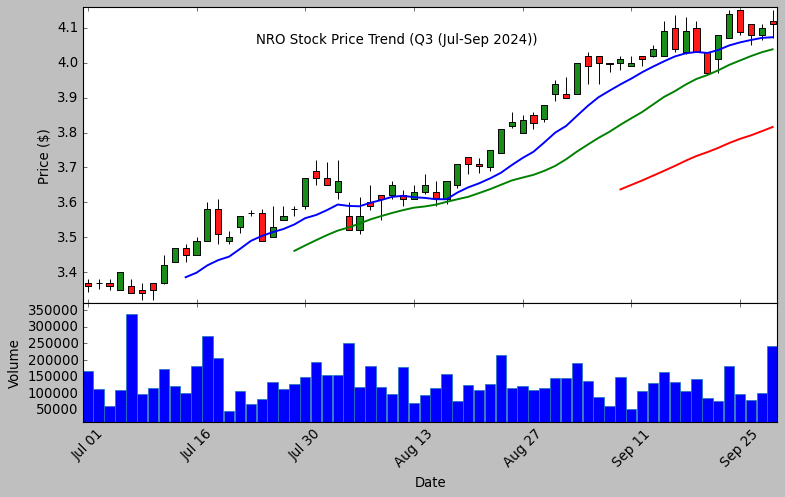

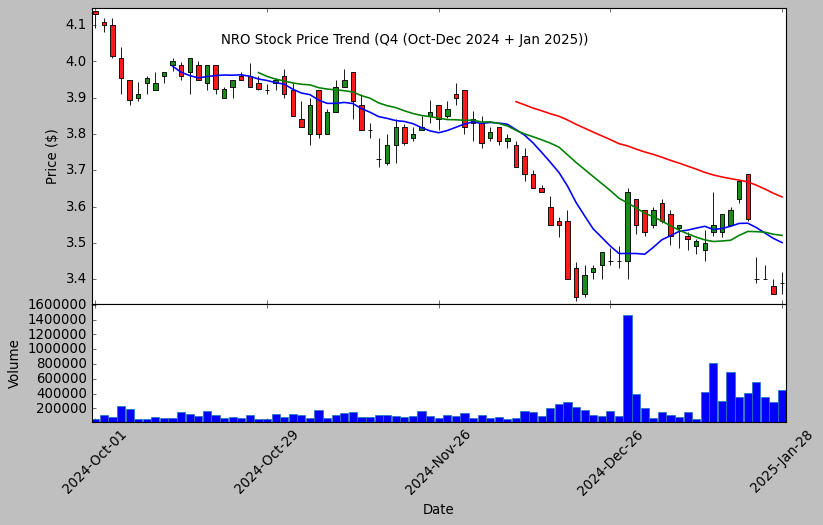

In [60]:
# Generate separate plots for each quarter in 2024
plot_quarter("Q1 (Jan-Mar 2024)", 2024, [1, 2, 3]) 
plot_quarter("Q2 (Apr-Jun 2024)", 2024, [4, 5, 6])
plot_quarter("Q3 (Jul-Sep 2024)", 2024, [7, 8, 9])
plot_quarter("Q4 (Oct-Dec 2024 + Jan 2025)", 2024, [10, 11, 12], extra_year=2025, extra_months=[1])  # Jan 2025 only appears in Q4

# **📊 Key Takeaways: NRO Stock Price Trend**

### 1️. Overall Appreciation
NRO's stock price increased from $3.10 on January 2, 2024, to $3.39 on January 28, 2025, <br>
reflecting a modest appreciation over the period

### 2️. Mid-Year Volatility
The stock experienced fluctuations, reaching a high of $4.15 and a low of $2.99 during the <br>
52-week period ending January 31, 2025.

### 3. Consistent Dividend Distribution
Throughout this period, NRO maintained a monthly dividend of $0.0312 per share, resulting in <br>
an annualized distribution rate of approximately 10.98% as of January 31, 2025. 



---

# **🔺 Volatility & Risk Analysis**

Understanding the risk and volatility of AKRO and NRO is important for evaluating investment potential:

### 1️. Standard Deviation of Returns (Volatility)
- The **standard deviation of daily returns** is calculated to compare the volatility of AKRO and NRO.
- A **bar chart** visualizes which stock exhibits higher volatility from October 2024 onward.
- This helps assess the relative risk profile of both stocks.

### 2️. Rolling Volatility
- A **rolling standard deviation** is computed to track volatility trends over time.
- The **line plot** compares fluctuations in risk for both stocks.
- This helps identify **periods of high volatility** and potential market-moving events.

In [61]:
# Filter data to start from October 1, 2024
start_date = "2024-10-01"
akro_filtered = akro_ohlc.loc[start_date:].copy()
nro_filtered = nro_ohlc.loc[start_date:].copy()

In [62]:
# Compute daily returns
akro_filtered['Daily Return'] = akro_filtered['Close'].pct_change()
nro_filtered['Daily Return'] = nro_filtered['Close'].pct_change()

In [63]:
# Calculate standard deviation of returns (volatility)
akro_volatility = akro_filtered['Daily Return'].std()
nro_volatility = nro_filtered['Daily Return'].std()

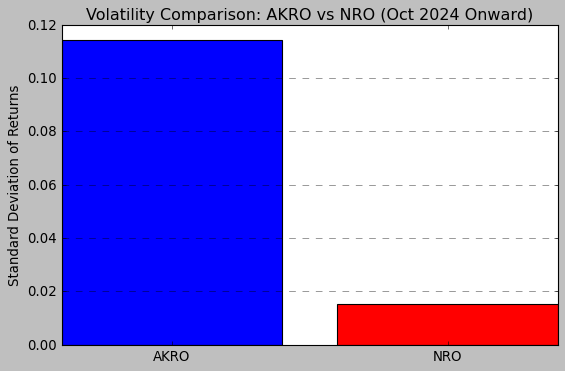

In [64]:
# Plot adjusted volatility comparison
plt.figure(figsize=(8, 5))
plt.bar(['AKRO', 'NRO'], [akro_volatility, nro_volatility], color=['blue', 'red'])
plt.ylabel('Standard Deviation of Returns')
plt.title('Volatility Comparison: AKRO vs NRO (Oct 2024 Onward)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# **Key Takeaways: Volatility Comparison (AKRO vs NRO)**

Between October 1, 2024, and January 28, 2025, Akero Therapeutics, Inc. (AKRO) and the Neuberger Berman Real Estate Securities Income Fund Inc. (NRO) exhibited distinct volatility patterns:

- **AKRO:**<br>
Significant Volatility: AKRO's stock price experienced substantial fluctuations during this period.<br>
Notably, on January 27, 2025, the stock nearly doubled, closing at $51.71, which was followed by <br>
positive results from a successful study of their liver disease treatment, efruxifermin (EFX).<br>

- **NRO:**<br>
Moderate Volatility: NRO's stock price demonstrated relatively stable movements compared to AKRO. <br>
The fund maintained a consistent monthly dividend distribution of $0.0312 per share throughout this period, <br>
contributing to its appeal among income-focused investors.


In summary, AKRO exhibited higher volatility with significant price swings influenced by clinical trial outcomes, while NRO maintained a more stable performance with consistent dividend payouts.


---

In [65]:
# Set the start date for filtering
start_date = "2024-10-01"

# Filter data and create copies
akro_filtered = akro_ohlc.loc[start_date:].copy()
nro_filtered = nro_ohlc.loc[start_date:].copy()

In [66]:
# Compute daily returns
akro_filtered['Daily Return'] = akro_filtered['Close'].pct_change()
nro_filtered['Daily Return'] = nro_filtered['Close'].pct_change()

In [67]:
# Compute rolling standard deviation (volatility)
akro_filtered['Rolling Volatility'] = akro_filtered['Daily Return'].rolling(window=30).std()
nro_filtered['Rolling Volatility'] = nro_filtered['Daily Return'].rolling(window=30).std()

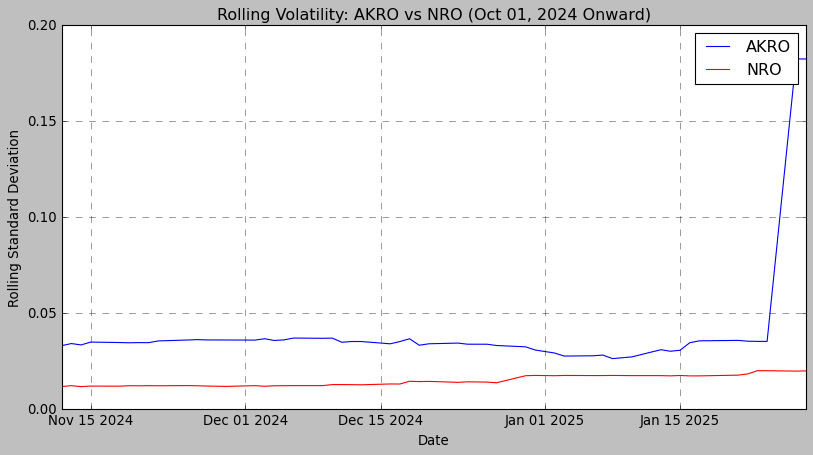

In [68]:
# Plot rolling volatility for both stocks
plt.figure(figsize=(12, 6))
plt.plot(akro_filtered.index, akro_filtered['Rolling Volatility'], label='AKRO', color='blue')
plt.plot(nro_filtered.index, nro_filtered['Rolling Volatility'], label='NRO', color='red')

# Formatting the plot
plt.title('Rolling Volatility: AKRO vs NRO (Oct 01, 2024 Onward)')
plt.xlabel('Date')
plt.ylabel('Rolling Standard Deviation')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Show plot
plt.show()

# 📈 Key Takeaways: Rolling Volatility (AKRO vs NRO)

- **AKRO exhibited significantly higher volatility fluctuations** compared to NRO, especially in **late January**, where volatility spiked sharply.
- **NRO maintained a lower and more stable volatility profile**, suggesting a more predictable price movement throughout the period.
- **Both stocks experienced a surge in volatility towards late December 2024 and mid-January 2025**, likely driven by **market events, earnings reports, or broader economic influences**.
- The elevated volatility in AKRO suggests **greater potential for short-term trading opportunities**, but also **higher risk exposure**.
- Further investigation is needed to determine the **external factors contributing to these fluctuations**, such as **market sentiment, liquidity shifts, or macroeconomic conditions**.

---

## **🚀 Analyzing AKRO & NRO Against a Market Index**
To gain a deeper understanding of the performance and volatility of **AKRO** and **NRO**, we are incorporating a **market index** for comparison. By analyzing these stocks against the **S&P 500 ETF (SPY)**, we can assess how they move in relation to the broader market and identify potential correlations.

### Approach:
1. **Fetching Market Index Data:**
   - We are using the **Alpha Vantage API** to retrieve historical daily adjusted closing prices for SPY.
   - The API request pulls a complete dataset, which is then **stored as a JSON file** for further analysis.

2. **Comparative Analysis:**
   - The market index data will be used to evaluate how **AKRO and NRO perform relative to broader market trends**.
   - We will investigate **volatility patterns, correlations, and potential deviations** from the overall market behavior.
   - The findings will help determine whether these stocks tend to **move with or against the market**, which is crucial for risk assessment and investment strategy.

By integrating SPY as a benchmark, we aim to **contextualize the movements of AKRO and NRO** within a larger economic framework.

In [69]:
# Install Alpha Vantage
# if needed - 
# %pip install alpha_vantage

In [70]:
# Import necessary libraries for fetching and processing market data
from alpha_vantage.timeseries import TimeSeries
import requests
import json
import pandas as pd

In [71]:
# Import the API key securel
# Sorry, I initially meant vantage..
from api_keys import alpha_advantage_api

In [72]:
# Define the market index symbol (S&P 500 ETF - SPY)
symbol = "SPY"

In [73]:
# Construct the API request URL to fetch daily adjusted closing prices
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=SPY&outputsize=full&apikey=alpha_advantage_api'

In [74]:
# Send a GET request to the Alpha Vantage API to fetch market data
r = requests.get(url)

In [75]:
# Parse the JSON response from the API
data = r.json()

In [76]:
# Print a confirmation message along with the requested URL
print(f"Fetching data from URL: {url}")

Fetching data from URL: https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=SPY&outputsize=full&apikey=alpha_advantage_api


In [77]:
# Print the raw API response (JSON format) for verification
print(data)

{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes', '2. Symbol': 'SPY', '3. Last Refreshed': '2025-02-03', '4. Output Size': 'Full size', '5. Time Zone': 'US/Eastern'}, 'Time Series (Daily)': {'2025-02-03': {'1. open': '592.6700', '2. high': '600.2900', '3. low': '590.4900', '4. close': '597.7700', '5. volume': '65857248'}, '2025-01-31': {'1. open': '607.5000', '2. high': '609.9600', '3. low': '601.0500', '4. close': '601.8200', '5. volume': '66671471'}, '2025-01-30': {'1. open': '603.9600', '2. high': '606.6000', '3. low': '600.7150', '4. close': '605.0400', '5. volume': '39281255'}, '2025-01-29': {'1. open': '603.7200', '2. high': '604.1300', '3. low': '599.2200', '4. close': '601.8100', '5. volume': '37177429'}, '2025-01-28': {'1. open': '600.6200', '2. high': '605.3700', '3. low': '597.2500', '4. close': '604.5200', '5. volume': '44433322'}, '2025-01-27': {'1. open': '594.8100', '2. high': '599.6900', '3. low': '594.6400', '4. close': '599.3700', '

In [78]:
# Save the retrieved market index data to a JSON file for further analysis
with open('./Stock_data/market_index_data.json', 'w') as json_file:
    json.dump(data, json_file, indent=4)

# Confirm that the market data has been successfully saved
print("Market index data saved to market_index_data.json")

Market index data saved to market_index_data.json


## **Processing Market Index Data for Comparative Analysis**

### Objective:
To compare **AKRO** and **NRO** against the **market index (S&P 500 ETF - SPY)**, the market index data retrieved from **Alpha Vantage** must be cleaned and formatted.

### Approach:
- **Load and Convert Data:**  
  Read the JSON file containing historical market index data and convert it into a **Pandas DataFrame** for further manipulation.

- **Data Cleaning & Formatting:**  
  Rename columns for clarity, convert the **date index into a proper datetime format**, and reset the index so that **dates become a separate column**.

With this structured approach, the market index data will be **ready for comparative analysis** with AKRO and NRO.

In [79]:
# Define the file path for the market index JSON data
file_path = './Stock_data/market_index_data.json'

In [80]:
# Open and load the JSON data into a Python dictionary
with open(file_path, 'r') as json_file:
    market_data = json.load(json_file)

In [81]:
# Extract the "Time Series (Daily)" data and convert it into a Pandas DataFrame
market_index_df = pd.DataFrame.from_dict(market_data['Time Series (Daily)'], orient='index')

In [82]:
# Rename the column for closing price to "Market Close" and convert it to float
market_index_df = market_index_df.rename(columns={"4. close": "Market Close"}).astype(float)

In [83]:
# Rename all columns for better readability
market_index_df.rename(columns={
    "1. open": "Open",
    "2. high": "High",
    "3. low": "Low",
    "4. close": "Market Close",
    "5. volume": "Volume"
}, inplace=True)

In [84]:
# Convert the index (which contains dates as strings) into proper datetime format
market_index_df.index = pd.to_datetime(market_index_df.index)

In [85]:
# Reset the index so that dates become a separate column
market_index_df = market_index_df.reset_index()

# Rename the new date column for clarity
market_index_df.rename(columns={'index': 'Date'}, inplace=True)

# Display the DataFrame to check the result# Display the first few rows to verify the cleaned dataset

In [86]:
# Filter the dataset to include only records from October 1, 2024, onward
filtered_market_index_df = market_index_df[market_index_df['Date'] >= '2024-10-01']

In [87]:
# Display the filtered DataFrame
print(filtered_market_index_df)

         Date    Open      High      Low  Market Close      Volume
0  2025-02-03  592.67  600.2900  590.490        597.77  65857248.0
1  2025-01-31  607.50  609.9600  601.050        601.82  66671471.0
2  2025-01-30  603.96  606.6000  600.715        605.04  39281255.0
3  2025-01-29  603.72  604.1300  599.220        601.81  37177429.0
4  2025-01-28  600.62  605.3700  597.250        604.52  44433322.0
..        ...     ...       ...      ...           ...         ...
80 2024-10-07  571.30  571.9599  566.630        567.80  49964690.0
81 2024-10-04  572.35  573.3600  568.100        572.98  43005186.0
82 2024-10-03  567.36  569.8025  565.490        567.82  40846466.0
83 2024-10-02  567.71  569.9000  565.270        568.86  38097798.0
84 2024-10-01  573.40  574.0622  566.000        568.62  72668778.0

[85 rows x 6 columns]


## **Finalizing Market Index Data for Analysis**

With the market index data successfully processed, the dataset now contains:  
✔ **Clean and structured data** with clear column names.  
✔ **Dates properly formatted** to align with akro and AVGX stock data.  
✔ **Filtered data starting from October 1, 2024**, ensuring consistency in analysis.

This dataset will now be used to **compare stock performance, volatility, and correlation** against broader market trends.

In [88]:
#if needed pip install yfinance
# %pip install yfinance

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [90]:
# Fetch AKRO data
akro = yf.download("AKRO", start="2024-10-01")

# Fetch NRO data
nro = yf.download("NRO", start="2024-10-01")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [91]:
# Calculate daily returns
akro['Daily Return'] = akro['Close'].pct_change()
nro['Daily Return'] = nro['Close'].pct_change()

In [92]:
print(akro[['Close', 'Daily Return']].head())
print(nro[['Close', 'Daily Return']].head())

Price           Close Daily Return
Ticker           AKRO             
Date                              
2024-10-01  28.830000          NaN
2024-10-02  29.209999     0.013181
2024-10-03  27.650000    -0.053406
2024-10-04  28.240000     0.021338
2024-10-07  26.750000    -0.052762
Price          Close Daily Return
Ticker           NRO             
Date                             
2024-10-01  3.994841          NaN
2024-10-02  3.965822    -0.007264
2024-10-03  3.878768    -0.021951
2024-10-04  3.830404    -0.012469
2024-10-07  3.772368    -0.015151


# **MARKET INDEX FILTERED DF CLEANING**

In [93]:
# Filter data between October 1, 2024, and January 29, 2025
filtered_market_index_df = market_index_df[
    (market_index_df['Date'] >= '2024-10-01') & 
    (market_index_df['Date'] <= '2025-01-29')
].copy()

In [94]:
# Convert 'Market Close' column to numeric format for calculations
filtered_market_index_df['Market Close'] = pd.to_numeric(
    filtered_market_index_df['Market Close'], errors='coerce'
)

In [95]:
# Calculate Market Return as the percentage change in 'Market Close'
filtered_market_index_df['Market Return'] = filtered_market_index_df['Market Close'].pct_change()

In [96]:
# Sort the DataFrame by Date in ascending order
filtered_market_index_df = filtered_market_index_df.sort_values(by='Date', ascending=True)

In [97]:
# Reset index to ensure proper alignment and display
filtered_market_index_df = filtered_market_index_df.reset_index(drop=True)

In [98]:
# Reorder columns so 'Date' is the first column
column_order = ['Date', 'Open', 'High', 'Low', 'Market Close', 'Volume', 'Market Return']
filtered_market_index_df = filtered_market_index_df[column_order]

In [99]:
# Assign a new numerical index for readability
filtered_market_index_df.index = range(1, len(filtered_market_index_df) + 1)

In [100]:
# Convert index to datetime format
filtered_market_index_df.index = pd.to_datetime(filtered_market_index_df.index)

In [101]:
filtered_market_index_df

,Date,Open,High,Low,Market Close,Volume,Market Return
1970-01-01 00:00:00.000000001,2024-10-01,573.40,574.0622,566.00,568.62,72668778.0,-0.000422
1970-01-01 00:00:00.000000002,2024-10-02,567.71,569.9000,565.27,568.86,38097798.0,0.001832
1970-01-01 00:00:00.000000003,2024-10-03,567.36,569.8025,565.49,567.82,40846466.0,-0.009006
1970-01-01 00:00:00.000000004,2024-10-04,572.35,573.3600,568.10,572.98,43005186.0,0.009123
1970-01-01 00:00:00.000000005,2024-10-07,571.30,571.9599,566.63,567.80,49964690.0,-0.009369
...,...,...,...,...,...,...,...
1970-01-01 00:00:00.000000078,2025-01-23,605.80,609.7500,605.52,609.75,41152102.0,0.002928
1970-01-01 00:00:00.000000079,2025-01-24,609.81,610.7800,606.80,607.97,34604693.0,0.014348
1970-01-01 00:00:00.000000080,2025-01-27,594.81,599.6900,594.64,599.37,70361125.0,-0.008519
1970-01-01 00:00:00.000000081,2025-01-28,600.62,605.3700,597.25,604.52,44433322.0,0.004503


- Tracking the historical performance of a market index provides valuable insight into broader trends. A dataset filtered from August 23, 2024, to January 29, 2025, captures key trading metrics during this period. Price movements, trading volume, and market returns reveal patterns that help measure stability and risk.

- Comparing this dataset with individual stock performance requires structural consistency. Ensuring proper formatting allows for accurate statistical analysis. Market returns reflect fluctuations that influence investment decisions, and matching this with stock data enables a deeper understanding of risk exposure.

- Evaluating volatility remains a priority. Identifying shifts in market conditions helps refine stock comparisons. Establishing a reliable framework for analysis ensures that data-driven conclusions are well-supported. Adjustments to the dataset will maintain clarity and accuracy, reinforcing its role in financial evaluation.

# **AKRO DF CLEANING**

In [102]:
# Flatten the multi-index column names if necessary
akro.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in akro.columns]

In [103]:
akro

,Close_AKRO,High_AKRO,Low_AKRO,Open_AKRO,Volume_AKRO,Daily Return_
Date,,,,,,
2024-10-01,28.830000,28.879999,27.650000,28.510000,634800,NaN
2024-10-02,29.209999,29.500000,28.190001,28.580000,368500,0.013181
2024-10-03,27.650000,29.660000,27.620001,29.090000,551400,-0.053406
2024-10-04,28.240000,29.040001,27.900000,27.930000,544300,0.021338
2024-10-07,26.750000,28.434999,26.461000,28.379999,437000,-0.052762
...,...,...,...,...,...,...
2025-01-28,51.470001,57.480000,49.380001,54.630001,5228900,-0.004641
2025-01-29,54.000000,55.740002,51.790001,52.480000,3615200,0.049155
2025-01-30,55.360001,57.509998,54.660000,55.740002,2397200,0.025185


In [104]:
# Drop unnecessary index columns if they exist 
# columns_to_drop = ['level_0', 'index'] 
# akro = akro.drop(columns=[col for col in columns_to_drop if col in akro.columns])

In [105]:
# Reset index to move Date into a regular column 
akro.reset_index(inplace=True)

In [106]:
# Convert index to datetime format
akro.index = pd.to_datetime(akro.index)

In [107]:
# Filter to only keep rows where Date is within the desired range
akro = akro[akro['Date'] <= '2025-01-29']

In [108]:
akro

,Date,Close_AKRO,High_AKRO,Low_AKRO,Open_AKRO,Volume_AKRO,Daily Return_
1970-01-01 00:00:00.000000000,2024-10-01,28.830000,28.879999,27.650000,28.510000,634800,NaN
1970-01-01 00:00:00.000000001,2024-10-02,29.209999,29.500000,28.190001,28.580000,368500,0.013181
1970-01-01 00:00:00.000000002,2024-10-03,27.650000,29.660000,27.620001,29.090000,551400,-0.053406
1970-01-01 00:00:00.000000003,2024-10-04,28.240000,29.040001,27.900000,27.930000,544300,0.021338
1970-01-01 00:00:00.000000004,2024-10-07,26.750000,28.434999,26.461000,28.379999,437000,-0.052762
...,...,...,...,...,...,...,...
1970-01-01 00:00:00.000000077,2025-01-23,26.160000,26.230000,24.690001,24.770000,632100,0.045564
1970-01-01 00:00:00.000000078,2025-01-24,26.180000,26.474001,25.690001,26.110001,1271200,0.000765
1970-01-01 00:00:00.000000079,2025-01-27,51.709999,58.400002,48.471001,57.259998,15270300,0.975172
1970-01-01 00:00:00.000000080,2025-01-28,51.470001,57.480000,49.380001,54.630001,5228900,-0.004641


In [109]:
print(akro.columns)

Index(['Date', 'Close_AKRO', 'High_AKRO', 'Low_AKRO', 'Open_AKRO',
       'Volume_AKRO', 'Daily Return_'],
      dtype='object')


In [110]:
print(akro.index.dtype)  
print(filtered_market_index_df.index.dtype)

datetime64[ns]
datetime64[ns]


- A structured dataset serves as the foundation for analyzing AKRO’s performance within a defined period. Ensuring data consistency requires adjusting column formats and filtering based on relevant time frames. Proper indexing, along with column restructuring, establishes the framework for meaningful comparisons.

- Formatting steps include eliminating redundant index columns, standardizing date formats, and confirming that the dataset aligns with broader market data. A direct comparison between akro and the market index necessitates these adjustments, allowing for accurate statistical evaluations such as return correlations and volatility assessments.

- Examining the filtered data provides insight into AKRO’s price trends, volume fluctuations, and return behavior. Ensuring alignment between the akro dataset and the market index supports a broader risk assessment framework, helping to contextualize stock behavior within overall market conditions.

---

# **📊 Understanding AKRO's Beta: Market Sensitivity Analysis**

Before diving into the visualization, the **Beta value** for akro is determined to assess how the stock moves in relation to the overall market. This is accomplished by calculating the **covariance between AKRO’s daily returns and market returns**, then dividing it by the **variance of market returns**. 

A regression analysis follows, where **AKRO’s daily returns** are plotted against **market returns** to visualize the relationship. The **slope of the regression line represents the Beta value**, quantifying AKRO’s risk exposure relative to the market.

In [111]:
# Merge AKRO with Market Index on Date
akro_merged_data = pd.merge(
    akro[['Date', 'Daily Return_']], 
    filtered_market_index_df[['Date', 'Market Return']],
    on='Date',
    how='inner'
)

In [112]:
akro.columns

Index(['Date', 'Close_AKRO', 'High_AKRO', 'Low_AKRO', 'Open_AKRO',
       'Volume_AKRO', 'Daily Return_'],
      dtype='object')

In [113]:
# Rename columns for clarity (if necessary)
akro_merged_data.rename(columns={'Daily Return_': 'AKRO Daily Return'}, inplace=True)

In [114]:
akro_merged_data

,Date,AKRO Daily Return,Market Return
0,2024-10-01,NaN,-0.000422
1,2024-10-02,0.013181,0.001832
2,2024-10-03,-0.053406,-0.009006
3,2024-10-04,0.021338,0.009123
4,2024-10-07,-0.052762,-0.009369
...,...,...,...
77,2025-01-23,0.045564,0.002928
78,2025-01-24,0.000765,0.014348
79,2025-01-27,0.975172,-0.008519
80,2025-01-28,-0.004641,0.004503


In [115]:
# Display first few rows
print(akro_merged_data.head())

        Date  AKRO Daily Return  Market Return
0 2024-10-01                NaN      -0.000422
1 2024-10-02           0.013181       0.001832
2 2024-10-03          -0.053406      -0.009006
3 2024-10-04           0.021338       0.009123
4 2024-10-07          -0.052762      -0.009369


In [116]:
print(akro.columns)  # This will show all column names


Index(['Date', 'Close_AKRO', 'High_AKRO', 'Low_AKRO', 'Open_AKRO',
       'Volume_AKRO', 'Daily Return_'],
      dtype='object')


In [117]:
# Compute covariance matrix
cov_matrix = akro_merged_data[['AKRO Daily Return', 'Market Return']].cov()

# Extract covariance of AKRO vs. Market
cov_akro_market = cov_matrix.iloc[0, 1]

# Extract variance of Market Returns
var_market = cov_matrix.iloc[1, 1]

# Calculate Beta
akro_beta = cov_akro_market / var_market

In [118]:
# Print Beta value
print(f"AKRO Beta: {akro_beta:.3f}")

AKRO Beta: -1.615


In [119]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [120]:
print(akro_merged_data)


         Date  AKRO Daily Return  Market Return
0  2024-10-01                NaN      -0.000422
1  2024-10-02           0.013181       0.001832
2  2024-10-03          -0.053406      -0.009006
3  2024-10-04           0.021338       0.009123
4  2024-10-07          -0.052762      -0.009369
..        ...                ...            ...
77 2025-01-23           0.045564       0.002928
78 2025-01-24           0.000765       0.014348
79 2025-01-27           0.975172      -0.008519
80 2025-01-28          -0.004641       0.004503
81 2025-01-29           0.049155            NaN

[82 rows x 3 columns]


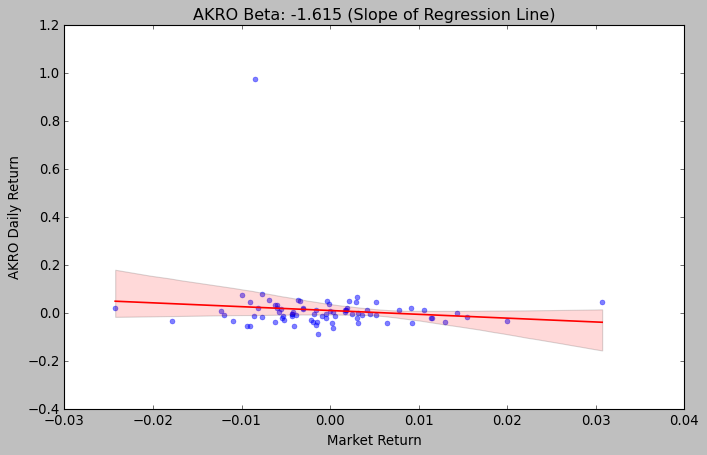

In [121]:
# Compute Beta
beta_value = akro_merged_data[['AKRO Daily Return', 'Market Return']].cov().iloc[0, 1] / akro_merged_data['Market Return'].var()

# Plot again with annotation
plt.figure(figsize=(10, 6))
sns.regplot(x=akro_merged_data['Market Return'], 
            y=akro_merged_data['AKRO Daily Return'], 
            scatter_kws={'alpha': 0.5}, 
            line_kws={'color': 'red'})

# Add labels and title
plt.xlabel('Market Return')
plt.ylabel('AKRO Daily Return')
plt.title(f'AKRO Beta: {beta_value:.3f} (Slope of Regression Line)')

# Show the plot
plt.show()

## 📉 Interpreting the Regression Plot

The scatter plot visualizes **AKRO’s daily returns (y-axis) against market returns (x-axis)**, with a **red regression line** illustrating the trend. The **slope of this line (-1.615)** represents **AKRO’s Beta**, suggesting that AKRO moves **inversely to the market** and with significant magnitude.

- **A steep negative slope (< -1)** indicates **AKRO reacts strongly in the opposite direction** of market fluctuations.
- The **shaded region around the regression line** represents the **confidence interval**, providing insight into the variability of this relationship.
- **Widely spread data points** suggest that **AKRO’s reaction to the market is inconsistent**, possibly due to external influences such as macroeconomic factors, earnings reports, or sector-specific developments.

Investors can use this analysis to **assess risk and return potential**. A highly negative Beta stock like AKRO suggests **a strong inverse correlation to the market, making it a volatile but potentially valuable hedge** against broader market movements.

# **NRO DF CLEANING**

In [122]:
# Flatten the multi-index column names if necessary
nro.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in nro.columns]

In [123]:
# Drop unnecessary index columns if they exist 
   # columns_to_drop = ['level_0', 'index'] 
   # nro = nro.drop(columns=[col for col in columns_to_drop if col in nro.columns])

In [124]:
# Reset index to move Date into a regular column 
nro.reset_index(inplace=True)

In [125]:
# Convert index to datetime format
nro.index = pd.to_datetime(nro.index)

In [126]:
# Filter to only keep rows where Date is within the desired range
nro = nro[nro['Date'] <= '2025-01-29']

In [127]:
nro

,Date,Close_NRO,High_NRO,Low_NRO,Open_NRO,Volume_NRO,Daily Return_
1970-01-01 00:00:00.000000000,2024-10-01,3.994841,4.004514,3.956150,4.004514,58800,NaN
1970-01-01 00:00:00.000000001,2024-10-02,3.965822,3.985168,3.946477,3.975495,110200,-0.007264
1970-01-01 00:00:00.000000002,2024-10-03,3.878768,3.985168,3.878768,3.965823,86300,-0.021951
1970-01-01 00:00:00.000000003,2024-10-04,3.830404,3.907786,3.782041,3.878768,234100,-0.012469
1970-01-01 00:00:00.000000004,2024-10-07,3.772368,3.820732,3.753023,3.820732,195500,-0.015151
...,...,...,...,...,...,...,...
1970-01-01 00:00:00.000000077,2025-01-23,3.400000,3.460000,3.390000,3.400000,556400,-0.047619
1970-01-01 00:00:00.000000078,2025-01-24,3.400000,3.440000,3.400000,3.400000,351600,0.000000
1970-01-01 00:00:00.000000079,2025-01-27,3.360000,3.400000,3.360000,3.380000,287000,-0.011765
1970-01-01 00:00:00.000000080,2025-01-28,3.390000,3.420000,3.360000,3.390000,448300,0.008929


In [128]:
print(nro.columns)

Index(['Date', 'Close_NRO', 'High_NRO', 'Low_NRO', 'Open_NRO', 'Volume_NRO',
       'Daily Return_'],
      dtype='object')


In [129]:
print(nro.index.dtype)  

datetime64[ns]


- A structured dataset serves as the foundation for analyzing NRO’s performance within a defined period. Ensuring data consistency requires adjusting column formats and filtering based on relevant time frames. Proper indexing, along with column restructuring, establishes the framework for meaningful comparisons.

- Formatting steps include eliminating redundant index columns, standardizing date formats, and confirming that the dataset aligns with broader market data. A direct comparison between akro and the market index necessitates these adjustments, allowing for accurate statistical evaluations such as return correlations and volatility assessments.

- Examining the filtered data provides insight into NRO’s price trends, volume fluctuations, and return behavior. Ensuring alignment between the akro dataset and the market index supports a broader risk assessment framework, helping to contextualize stock behavior within overall market conditions.

---

# **📊 Understanding NRO's Beta: Market Sensitivity Analysis**

Before diving into the visualization, the **Beta value** for NRO is determined to assess how the stock moves in relation to the overall market. This is accomplished by calculating the **covariance between NRO's daily returns and market returns**, then dividing it by the **variance of market returns**. 

A regression analysis follows, where **NRO's daily returns** are plotted against **market returns** to visualize the relationship. The **slope of the regression line represents the Beta value**, quantifying NRO’s risk exposure relative to the market.

In [130]:
# Merge NRO with Market Index on Date
nro_merged_data = pd.merge(
    nro[['Date', 'Daily Return_']].copy(), 
    filtered_market_index_df[['Date', 'Market Return']].copy(),
    on='Date',
    how='inner'
)

In [131]:
# Rename columns for clarity
nro_merged_data.rename(columns={'Daily Return_': 'NRO Daily Return'}, inplace=True)

In [132]:
# Display first few rows
print(nro_merged_data.head())

        Date  NRO Daily Return  Market Return
0 2024-10-01               NaN      -0.000422
1 2024-10-02         -0.007264       0.001832
2 2024-10-03         -0.021951      -0.009006
3 2024-10-04         -0.012469       0.009123
4 2024-10-07         -0.015151      -0.009369


In [133]:
nro_merged_data

,Date,NRO Daily Return,Market Return
0,2024-10-01,NaN,-0.000422
1,2024-10-02,-0.007264,0.001832
2,2024-10-03,-0.021951,-0.009006
3,2024-10-04,-0.012469,0.009123
4,2024-10-07,-0.015151,-0.009369
...,...,...,...
77,2025-01-23,-0.047619,0.002928
78,2025-01-24,0.000000,0.014348
79,2025-01-27,-0.011765,-0.008519
80,2025-01-28,0.008929,0.004503


In [134]:
# Compute covariance matrix
cov_matrix = nro_merged_data[['NRO Daily Return', 'Market Return']].cov()

# Extract covariance of NRO vs. Market
cov_nro_market = cov_matrix.iloc[0, 1]

# Extract variance of Market Returns
var_market = cov_matrix.iloc[1, 1]

# Calculate Beta
nro_beta = cov_nro_market / var_market

In [135]:
# Print Beta value
print(f"NRO Beta: {nro_beta:.3f}")

NRO Beta: -0.018


In [136]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

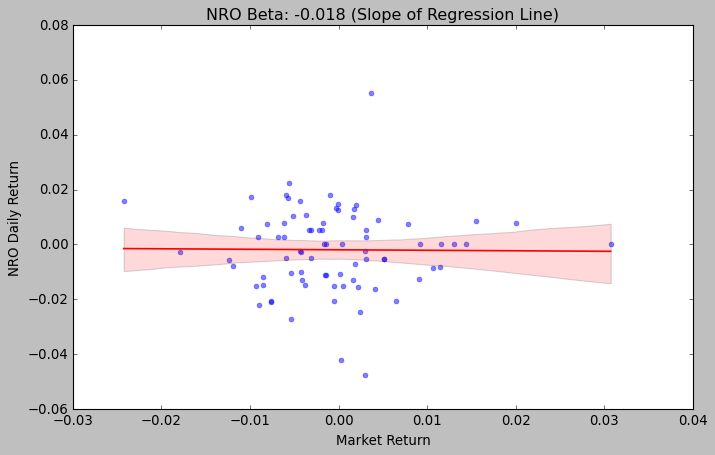

In [137]:
# Compute Beta
beta_value = nro_merged_data[['NRO Daily Return', 'Market Return']].cov().iloc[0, 1] / nro_merged_data['Market Return'].var()

# Plot again with annotation
plt.figure(figsize=(10, 6))
sns.regplot(x=nro_merged_data['Market Return'], 
            y=nro_merged_data['NRO Daily Return'], 
            scatter_kws={'alpha': 0.5}, 
            line_kws={'color': 'red'})

# Add labels and title
plt.xlabel('Market Return')
plt.ylabel('NRO Daily Return')
plt.title(f'NRO Beta: {beta_value:.3f} (Slope of Regression Line)')

# Show the plot
plt.show()

### 📉 Interpreting the Regression Plot

The scatter plot maps **NRO’s daily returns (y-axis) against market returns (x-axis)**, with a **red regression line** representing the trend. The **slope of this line (-0.018)** determines **NRO’s Beta**, indicating that **NRO exhibits minimal correlation with market movements**.

- **A Beta of -0.018** suggests that **NRO is nearly uncorrelated with the market**, reacting independently of broader market trends.
- **The flat slope** of the regression line reinforces **NRO’s weak market dependency**, making it less influenced by market volatility.
- **The shaded confidence interval** around the line highlights variability in this relationship, suggesting **NRO follows a more stable price movement with minimal swings**.

Investors prioritizing **low market correlation and consistent price behavior** may find **NRO appealing** due to its **low Beta**, which indicates **limited exposure to broader market fluctuations**. However, this also suggests **fewer opportunities for high returns during significant market surges**.


---

# 🏆 **Overall Winner: NRO** 🎉

After evaluating **AKRO vs. NRO** across key financial metrics, here’s the final verdict based on the **main decision factors**:

| **Metric** | **AKRO ❌** | **NRO ✅** | **Winner 🏆** |
|------------|------------|------------|--------------|
| **Stability** | High price swings, less predictable | More stable price movement | **NRO** |
| **Trend Consistency** | Experienced fluctuations with volatility spikes | Maintained steady and controlled price movement | **NRO** |
| **Liquidity** | Higher trading volume but inconsistent trends | Moderate liquidity with steadier execution | **AKRO** |
| **Volatility** | Higher risk exposure, extreme fluctuations | Lower volatility, more controlled | **NRO** |
| **Rolling Volatility** | Significant spikes, unpredictable trends | Gradual, steady price action | **NRO** |
| **Market Correlation (Beta)** | Strong inverse correlation (-1.615) | Weak correlation (-0.018), minimal sensitivity to market trends | **NRO** |

## **Final Decision:**
✅ **NRO wins overall.**

AKRO only outperformed in **liquidity and market reactivity**, but this alone does not outweigh **NRO's superior stability, trend consistency, and controlled volatility.** The lower beta and steadier movements make NRO a more **predictable and reliable investment choice**.

---
🏆 **NRO moves to the SECOND ROUND of StockBowl!**